In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/10-monkey-species/monkey_labels.txt
/kaggle/input/10-monkey-species/validation/validation/n3/n3017.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n301.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n3013.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n316.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n307.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n310.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n3014.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n317.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n309.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n318.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n314.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n305.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n303.jpg
/kaggle/input/10-monkey-species/validation/validation/n3/n312.jpg
/kaggle/input/10-monkey

In [0]:
!ls /kaggle/input/10-monkey-species/

monkey_labels.txt  training  validation


In [0]:
import os
os.listdir('/kaggle/input/10-monkey-species/validation/validation/')

['n3', 'n5', 'n2', 'n4', 'n8', 'n9', 'n6', 'n0', 'n1', 'n7']

In [0]:
import os
os.listdir('/kaggle/input/10-monkey-species/training/training')

['n3', 'n5', 'n2', 'n4', 'n8', 'n9', 'n6', 'n0', 'n1', 'n7']

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
%matplotlib inline
# Hyperparams
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
NUM_CLASSES = 10
EPOCHS = 15
BATCH_SIZE = 64
TEST_SIZE = 30
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
training_data_dir = '../input/10-monkey-species/training/training/'
validation_data_dir = '../input/10-monkey-species/validation/validation/'

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
import keras
preprocessing_function=keras.applications.resnet50.preprocess_input
# Data augmentation
training_data_generator = ImageDataGenerator(
   preprocessing_function=keras.applications.resnet50.preprocess_input,
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   shear_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   vertical_flip=True)
training_generator = training_data_generator.flow_from_directory(
   training_data_dir,
   target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
   batch_size=BATCH_SIZE,
   class_mode="categorical")
validation_generator = training_data_generator.flow_from_directory(
   training_data_dir,
   target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
   batch_size=BATCH_SIZE,
   class_mode="categorical")

Found 1098 images belonging to 10 classes.
Found 1098 images belonging to 10 classes.


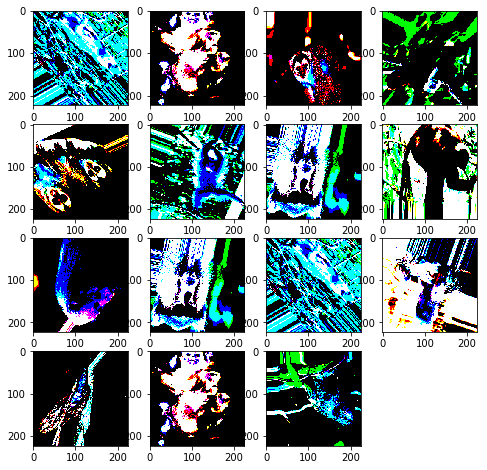

In [0]:
import numpy as np
x_batch, y_batch = validation_generator.next()
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 4
for i in range(1, columns*rows):
   num = np.random.randint(BATCH_SIZE)
   image = x_batch[num]
   fig.add_subplot(rows, columns, i)
   plt.imshow(image)
plt.show()

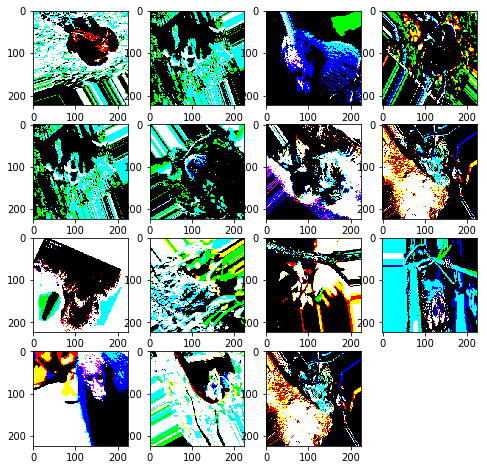

In [0]:
import numpy as np
x_batch, y_batch = validation_generator.next()
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 4
for i in range(1, columns*rows):
   num = np.random.randint(BATCH_SIZE)
   image = x_batch[num]
   fig.add_subplot(rows, columns, i)
   plt.imshow(image)
plt.show()

In [0]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [0]:
import keras
from keras.models import Model, load_model
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications import ResNet50, InceptionV3
from keras import backend as K
K.set_learning_phase(0)
#Load the VGG model
base_model = InceptionV3(weights='imagenet', include_top=False, pooling = 'avg', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
print(base_model.summary())
K.set_learning_phase(1)
# # Create the model
model = keras.models.Sequential()
# # Add the vgg convolutional base model
model.add(base_model)
# # Add new layers
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))
# Freeze the layers
for layer in base_model.layers:
   layer.trainable = False
# # Show a summary of the model. Check the number of trainable parameters
print(model.summary())

87916544/87910968 [==============================] - 4s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_99 (Activation)      (None, 111, 111, 32) 0           batch_normalization_3[0][0]      
____________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
batch_normalization_97 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 22,074,538
Trainable params: 267,658
Non-trainable params: 21,806,880
_________________________________________________________________
None


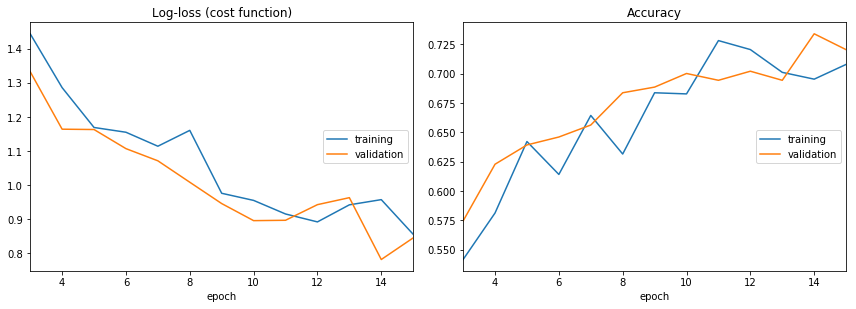

Log-loss (cost function):
training   (min:    0.856, max:    2.658, cur:    0.856)
validation (min:    0.782, max:    2.057, cur:    0.845)

Accuracy:
training   (min:    0.242, max:    0.728, cur:    0.708)
validation (min:    0.377, max:    0.734, cur:    0.721)


In [0]:
from keras.optimizers import SGD, Adam
model.compile(loss="categorical_crossentropy",
             optimizer=Adam(),
             metrics=["accuracy"])
# Training
model.fit_generator(
   training_generator,
   steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
   epochs=EPOCHS,
   validation_data=validation_generator,
   validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
   callbacks=[PlotLossesKeras()],
   verbose=1)